In [51]:
import psycopg2
import pandas as pd
import json

with open('database_config.json') as json_file:
    db_config = json.load(json_file)['gcp']
conn = psycopg2.connect(host=db_config['host'], user=db_config['user'], password=db_config['password'], database=db_config['database'], port=db_config['port'])
sql = 'SELECT * FROM "deepcite_call" ORDER by "created_at" DESC;'
mega_df = pd.read_sql_query(sql, conn)
mega_df = pd.concat([mega_df.drop(['response'], axis=1), mega_df['response'].apply(pd.Series)], axis=1).set_index('id')
mega_df.columns

Index(['user_id', 'stage', 'status_code', 'response_time_elapsed',
       'current_versions', 'created_at', 'error', 'results'],
      dtype='object')

list_versions
((api, 0.3.0), (extension, 1.1.0), (lambda, 0.3.0), (model, 0.6.0))    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
((api, 0.4.0), (extension, 1.2.1), (lambda, 0.4.0), (model, 0.6.0))    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
((api, 0.4.0), (extension, 1.3.0), (lambda, 0.5.0), (model, 0.6.0))    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
((api, 0.4.0), (extension, 1.4.0), (lambda, 0.6.0), (model, 0.7.0))    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
((api, 0.4.0), (extension, 1.4.1), (lambda, 0.7.0), (model, 0.7.0))    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
((api, 0.4.0), (extension, 1.5.0), (lambda, 0.7.1), (model, 0.8.0))    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

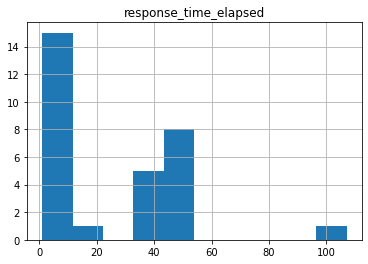

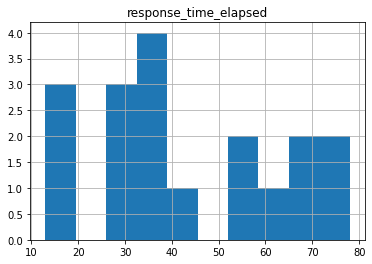

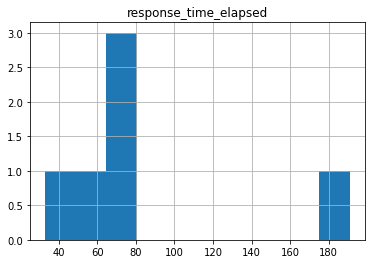

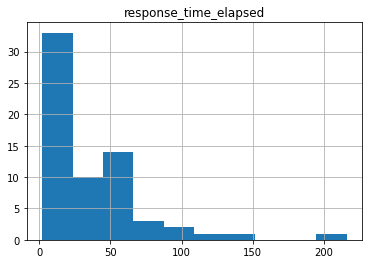

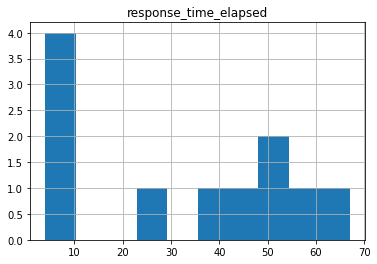

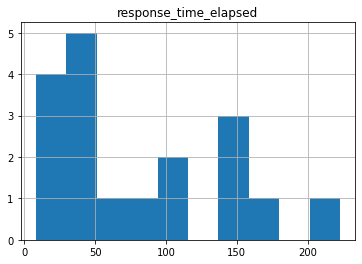

In [59]:
# mega_df[['response_time_elapsed', 'current_versions']].groupby('current_versions').sum()
def items_func(x):
    return tuple(sorted(x.items()))
mega_df['list_versions'] = mega_df.current_versions.apply(items_func)

mega_df[['response_time_elapsed', 'list_versions']].groupby('list_versions').hist()

In [54]:
mega_df.response_time_elapsed.quantile(.1)

6.0